### Continuous optimization with Genetic Algorithm and Particle Swarm Optimization

In [11]:
from sko.PSO import PSO
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [12]:
def max_function(x, y):
    return -((np.e ** (-0.05 * (x**2 + y**2))) * (np.arctan(x) - np.arctan(y) + (np.e ** -(x**2 + y**2)) * np.cos(2*x) * np.sin(2*y)))

In [13]:
def min_function(x, y):
    return ((np.e ** (-0.05 * (x**2 + y**2))) * (np.arctan(x) - np.arctan(y) + (np.e ** -(x**2 + y**2)) * np.cos(2*x) * np.sin(2*y)))

In [14]:
min_x_y = -5
max_x_y = 5
increment = 0.01
x_y_range = np.concatenate([np.arange(min_x_y, 0, step=increment), np.arange(0, max_x_y + increment, step=increment)])
x, y = x_y_range, x_y_range
X, Y = np.meshgrid(x, y)
R = max_function(X, Y)


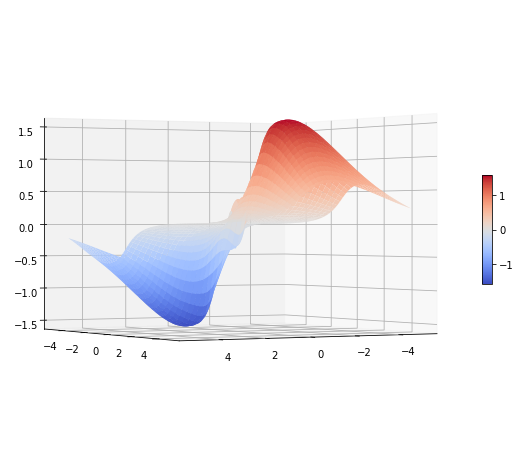

In [15]:
def plot_surface_fig(X, Y, R):
    Z = R
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=True)

    ax.set_zlim(np.min(Z), np.max(Z))
    ax.view_init(0, 60)

    fig.colorbar(surf, shrink=0.2, aspect=10)
    plt.show()
    
plot_surface_fig(X, Y, R)
plt.show()

In [16]:
pso_max = PSO(func=max_function, n_dim=2, pop=400, max_iter=30, lb=[-5, -5], ub=[5, 5], w=0.2, c1=0.9, c2=0.9)
pso_max.run()


pso_min = PSO(func=min_function, n_dim=2, pop=400, max_iter=30, lb=[-5, -5], ub=[5, 5], w=0.2, c1=0.9, c2=0.9)
pso_min.run()

print('Best coords min_problem:: ', pso_min.gbest_x, 'Best value min_problem:', pso_min.gbest_y)
print('Best coords max_problem:: ', pso_max.gbest_x, 'Best value max_problem:', -pso_max.gbest_y)

Best coords min_problem::  [-1.51385465  1.46580215] Best value min_problem: [-1.57102922]
Best coords max_problem::  [ 1.51385465 -1.46580216] Best value max_problem: [1.57102922]


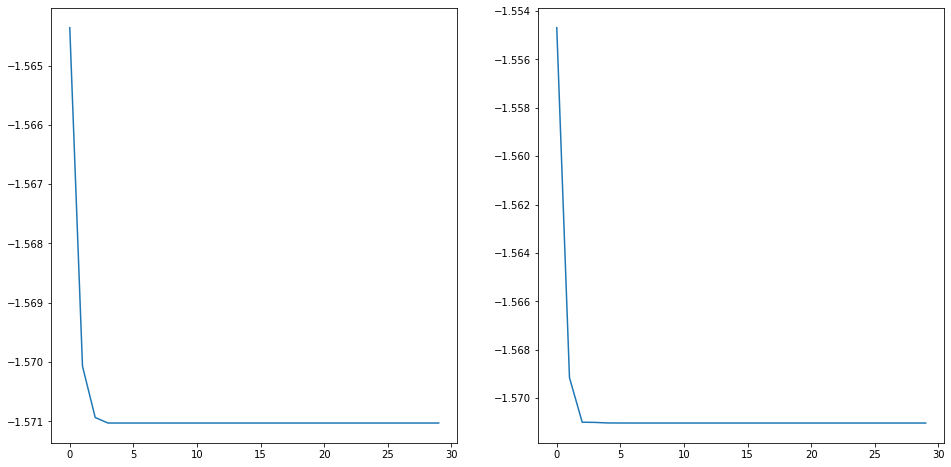

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(pso_max.gbest_y_hist)
plt.subplot(1, 2, 2)
plt.plot(pso_min.gbest_y_hist)
plt.show()

In [18]:
from sko.GA import GA
from sko.operators import ranking, selection, crossover, mutation


def genetic_algorithm(func):
    ga = GA(func=max_function, n_dim=2, size_pop=20, max_iter=2000, prob_mut=0.01,
            lb=[-5, -5], ub=[5, 5], precision=[1e-7, 1e-7])

    ga.register(operator_name='selection', operator=selection.selection_tournament)
    ga.register(operator_name='ranking', operator=ranking.ranking). \
        register(operator_name='crossover', operator=crossover.crossover_2point). \
        register(operator_name='mutation', operator=mutation.mutation)

    result = ga.run()
    
    return result


In [19]:
ga_result_max = genetic_algorithm(max_function)
ga_result_min = genetic_algorithm(min_function)

print('Best coords min_problem:: ', ga_result_max[0], 'Best value min_problem:', ga_result_max[1])
print('Best coords max_problem:: ',  ga_result_min[0], 'Best value max_problem:', -ga_result_min[1])

Best coords min_problem::  [ 1.51385461 -1.46580217] Best value min_problem: [-1.57102922]
Best coords max_problem::  [ 1.51385461 -1.46580217] Best value max_problem: [1.57102922]
